# Case Study: Customer segmentation on the Mall Customers dataset

## Objective

The objective of this case study is to apply clustering techniques on the Mall Customers dataset to segment customers into distinct groups based on their demographic and spending behavior. By identifying patterns across age, gender, annual income, and spending score, the study aims to uncover meaningful customer segments that can help businesses design targeted marketing strategies, personalize promotions, and improve customer engagement.

## Dataset Overview

The dataset used in this case study is the Mall Customers dataset, which contains basic demographic and spending-related information of customers.

It has the following columns:

- **CustomerID:** Unique identifier assigned to each customer.

- **Gender:** Gender of the customer (Male/Female).

- **Age:** Age of the customer in years.

- **Annual Income (k$):** Annual income of the customer, measured in thousand dollars.

- **Spending Score (1-100):** Score assigned by the mall based on customer behavior and spending patterns (higher values indicate higher spending).

## Load the Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df = df.drop('CustomerID',axis=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


## EDA

In [4]:
# Check missing values
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# Check numerical columns
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
# Check distribution of categorical column, i.e gender
df["Gender"].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

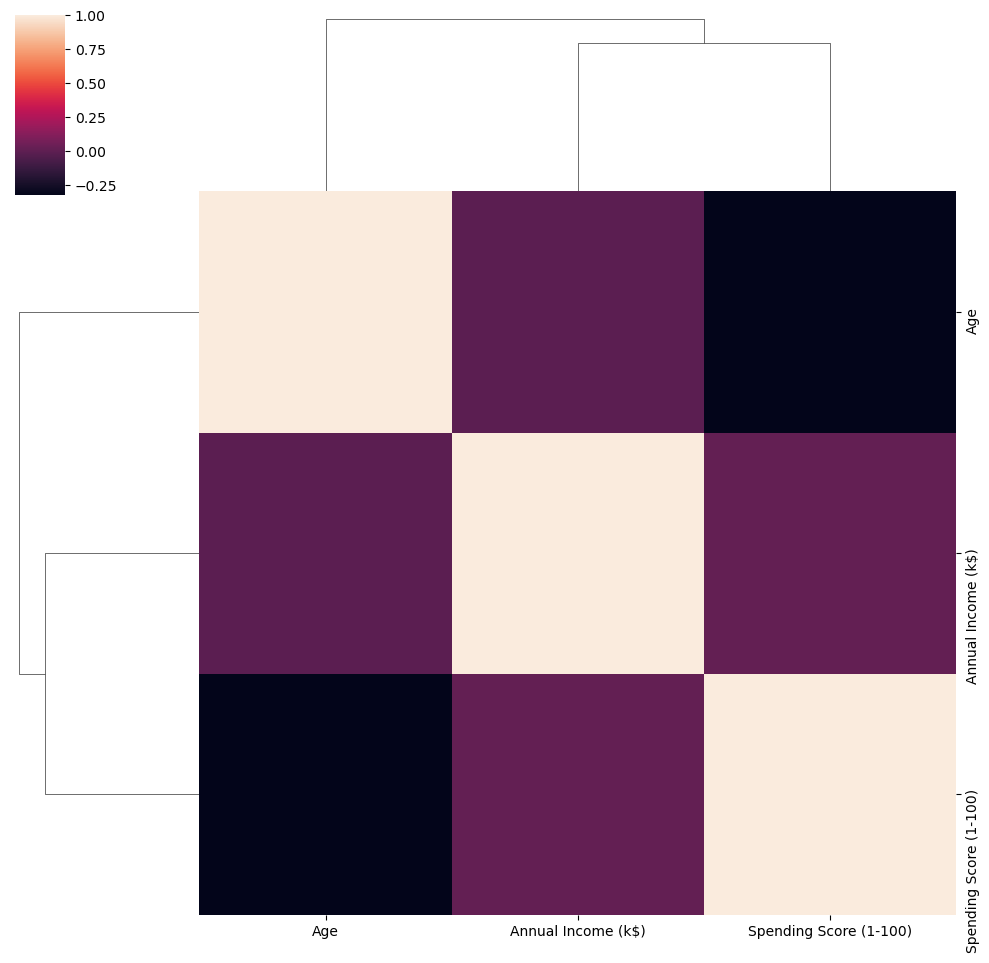

In [7]:
# Visualize hierarchical clustering
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.clustermap(df.select_dtypes(np.number).corr())


- Here we can see that the older the age, less the spending score. Age is negatively correlated, so if age is less, the spending score is also high.
- More the age, annual income should be high but here it is not showing highly correlated.



<Axes: xlabel='Annual Income (k$)', ylabel='Age'>

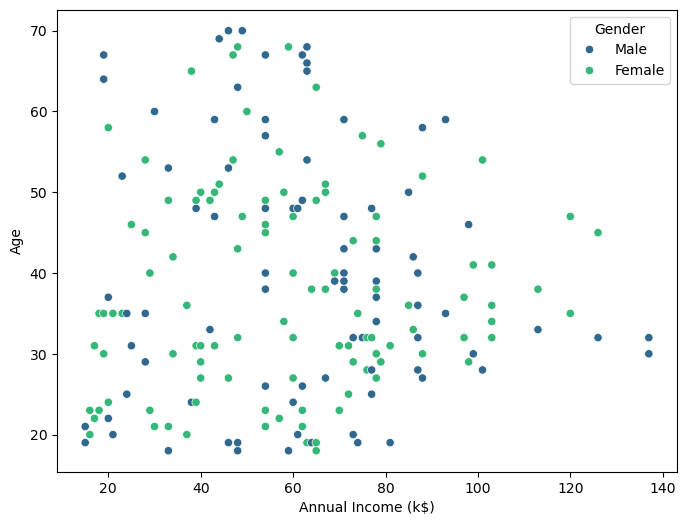

In [8]:
# Check patterns in income and age distribution across genders

plt.figure(figsize=(8,6),dpi=100)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Age', hue='Gender', palette='viridis')

No such relationship or pattern with annual income

Text(0.5, 1.05, 'Pairplot')

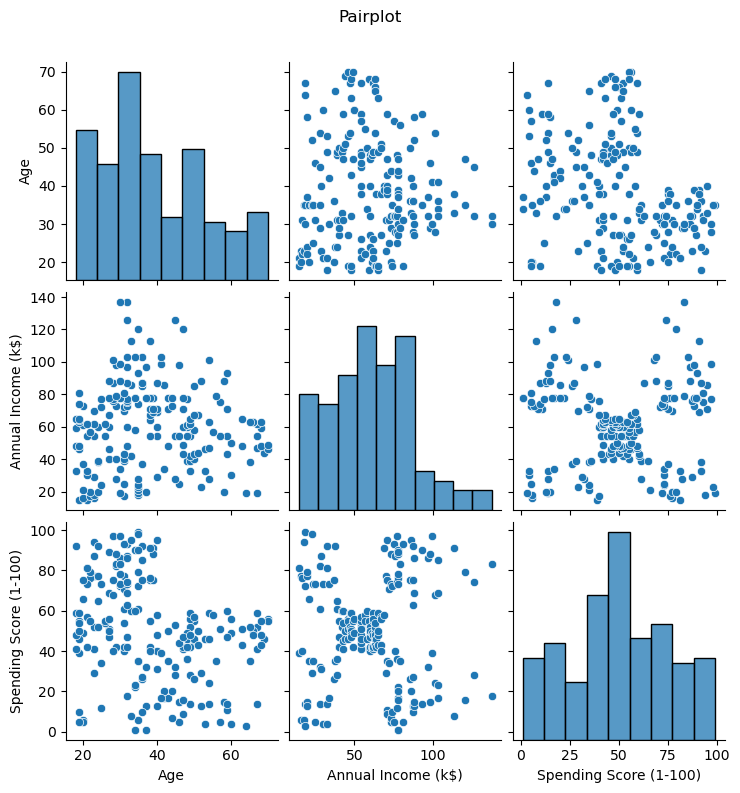

In [9]:
# Check correlation with pairplot
sns.pairplot(df)
plt.suptitle('Pairplot',y=1.05)

There is some kind of clusters or patterns between Annual income and spending score.

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

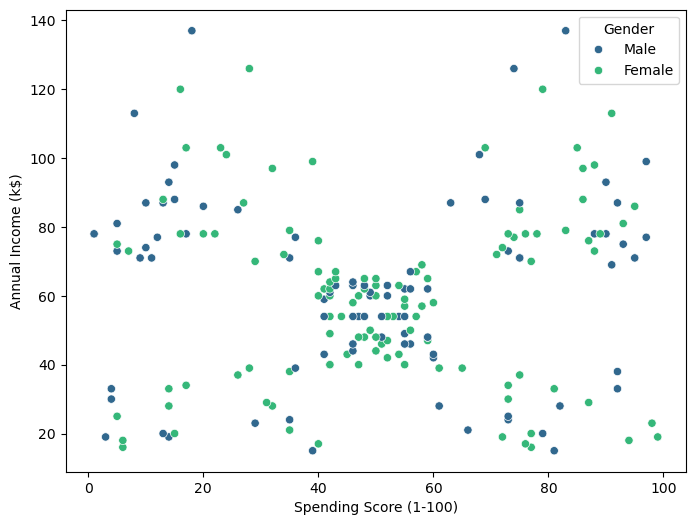

In [10]:
# Check patterns in Annual income and spending score across genders

plt.figure(figsize=(8,6),dpi=100)
sns.scatterplot(data=df, x='Spending Score (1-100)', y='Annual Income (k$)', hue='Gender', palette='viridis')

- Almost 5 clusters are visible

<Axes: xlabel='Spending Score (1-100)', ylabel='Age'>

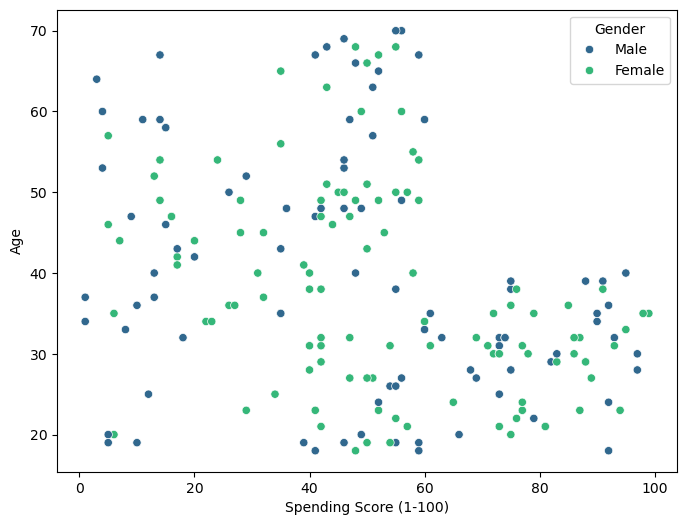

In [11]:
# Check patterns in spending score and age across genders

plt.figure(figsize=(8,6),dpi=100)
sns.scatterplot(data=df, x='Spending Score (1-100)', y='Age', hue='Gender', palette='viridis')

- No such significant patterns or clusters but slight negative correlation between age and spending score indicating lower the age , higher the spending score, which makes sense.

/var/folders/q_/nq1j8h3j7w5846w87zdj8hvr0000gn/T/ipykernel_2900/3821851188.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Age', palette='viridis')


<Axes: xlabel='Age', ylabel='count'>

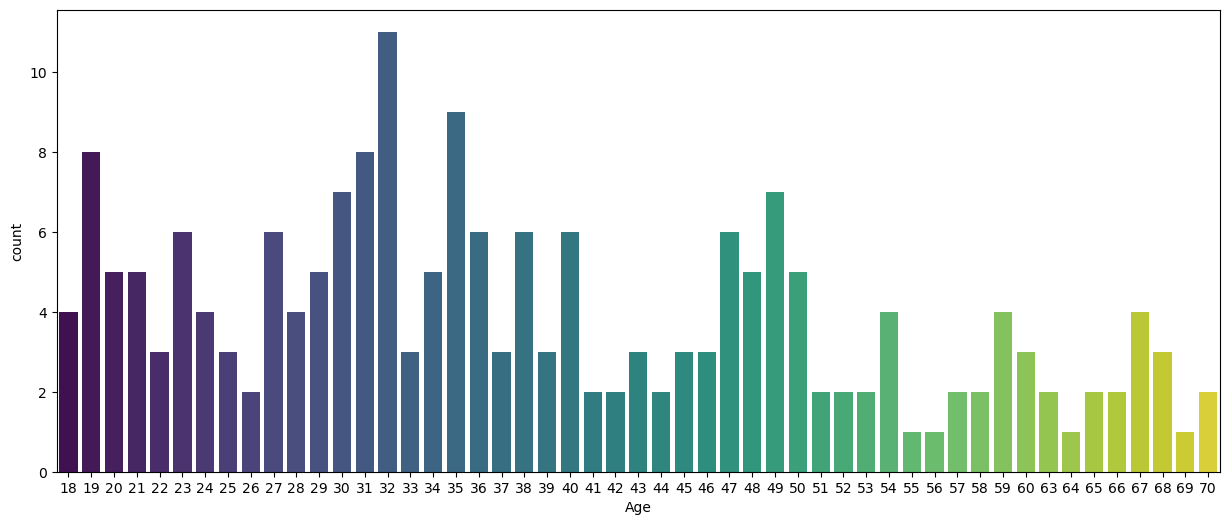

In [12]:
# Distribution of age
plt.figure(figsize=(15,6),dpi=100)
sns.countplot(data=df, x='Age', palette='viridis')

- Many people are around the age of 30

<Axes: xlabel='Age', ylabel='count'>

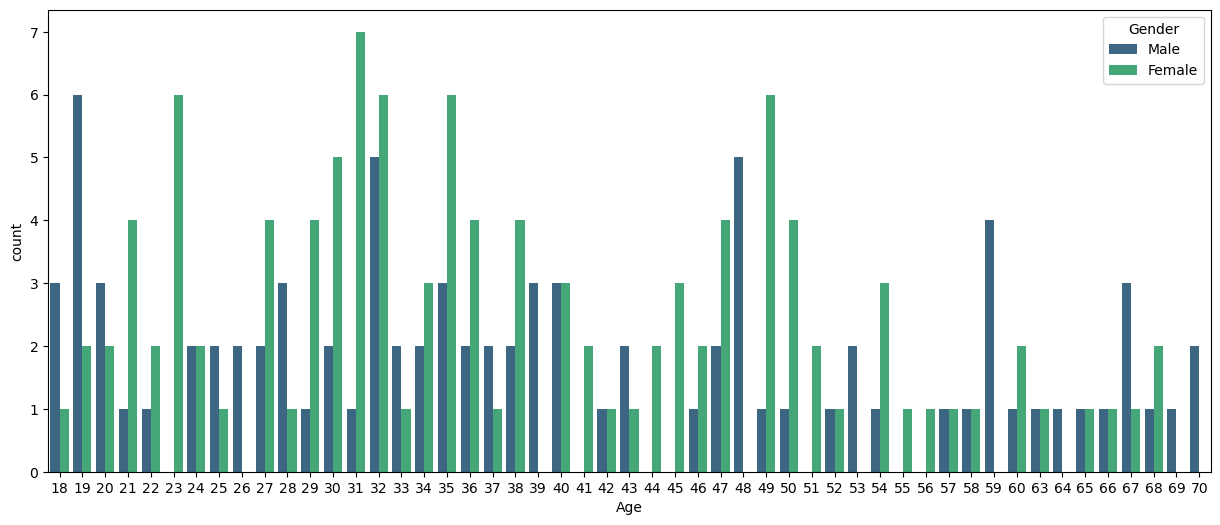

In [13]:
# Distribution of age across gender
plt.figure(figsize=(15,6),dpi=100)
sns.countplot(data=df, x='Age', hue='Gender', palette='viridis')

/var/folders/q_/nq1j8h3j7w5846w87zdj8hvr0000gn/T/ipykernel_2900/3817978310.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Annual Income (k$)', palette='viridis')


<Axes: xlabel='Annual Income (k$)', ylabel='count'>

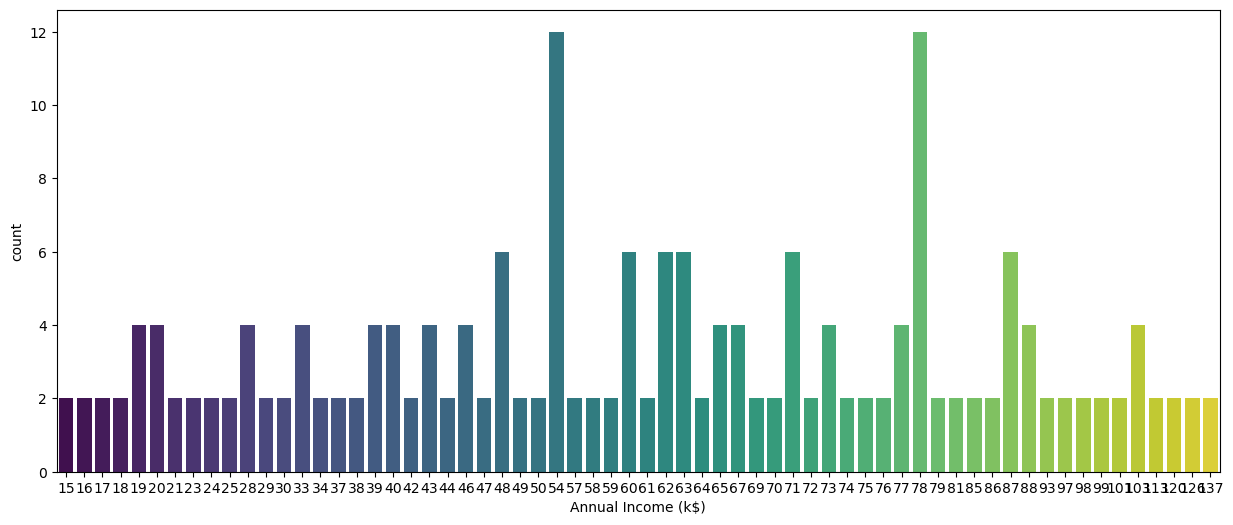

In [14]:
# Distribution of Annual income
plt.figure(figsize=(15,6),dpi=100)
sns.countplot(data=df, x='Annual Income (k$)', palette='viridis')

- No uniform distribution for Annual income

/var/folders/q_/nq1j8h3j7w5846w87zdj8hvr0000gn/T/ipykernel_2900/4241821420.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Spending Score (1-100)', palette='viridis')


<Axes: xlabel='Spending Score (1-100)', ylabel='count'>

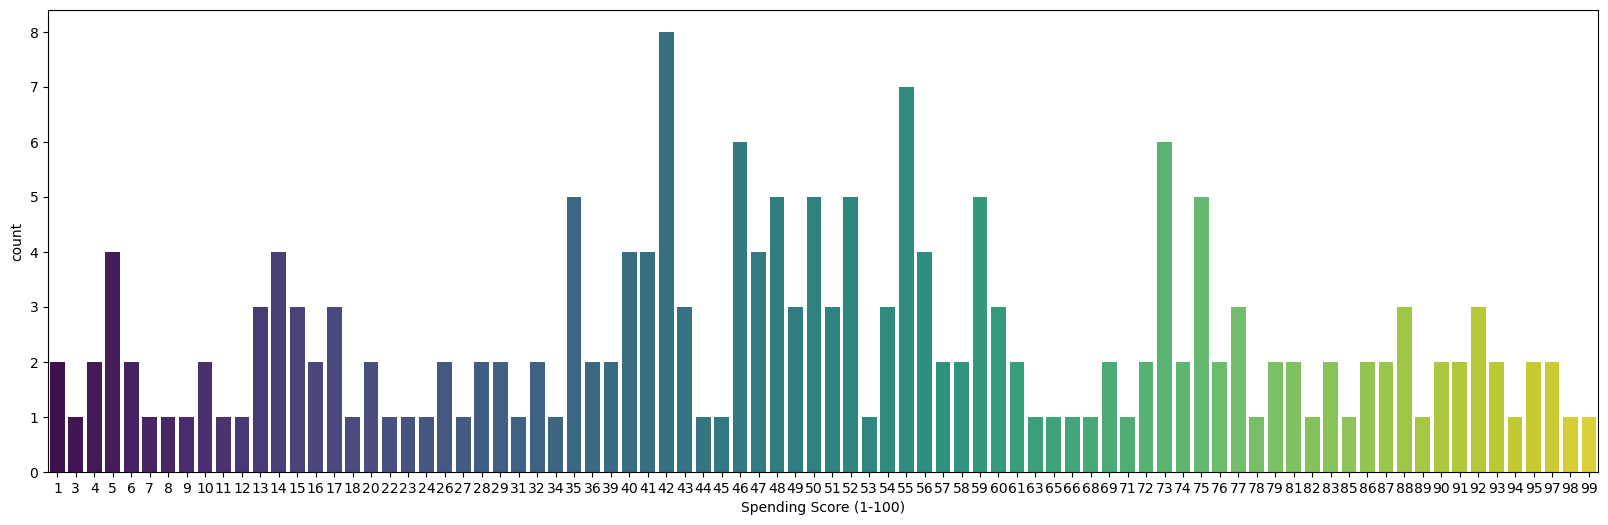

In [15]:
# Distribution of Spending Score (1-100)
plt.figure(figsize=(20,6),dpi=100)
sns.countplot(data=df, x='Spending Score (1-100)', palette='viridis')

/var/folders/q_/nq1j8h3j7w5846w87zdj8hvr0000gn/T/ipykernel_2900/3665445352.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Gender',x='Spending Score (1-100)', palette='viridis')


<Axes: xlabel='Spending Score (1-100)', ylabel='Gender'>

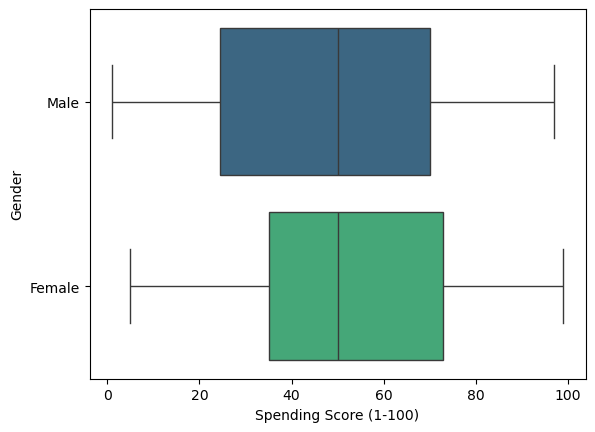

In [16]:
sns.boxplot(data=df, y='Gender',x='Spending Score (1-100)', palette='viridis')

In [17]:
df.groupby('Gender')['Spending Score (1-100)'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,51.526786,24.11495,5.0,35.0,50.0,73.0,99.0
Male,88.0,48.511364,27.89677,1.0,24.5,50.0,70.0,97.0


- Female spenders are more

/var/folders/q_/nq1j8h3j7w5846w87zdj8hvr0000gn/T/ipykernel_2900/2259778381.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Gender',x='Annual Income (k$)', palette='viridis')


<Axes: xlabel='Annual Income (k$)', ylabel='Gender'>

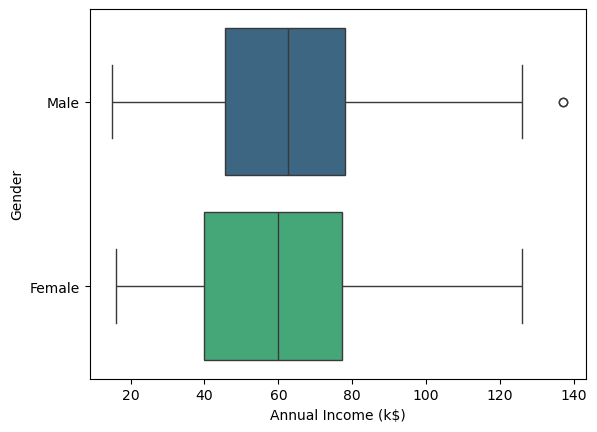

In [18]:
sns.boxplot(data=df, y='Gender',x='Annual Income (k$)', palette='viridis')

In [19]:
df.groupby('Gender')['Annual Income (k$)'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,59.250000,26.011952,16.0,39.75,60.0,77.25,126.0
Male,88.0,62.227273,26.638373,15.0,45.50,62.5,78.00,137.0


## Preprocessing

In [21]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [22]:
# Encode categorical columns - only one categorical column - Gender
# Converts categorical columns into dummy variables (one-hot encoding)
# drop_first=True avoids multicollinearity by dropping the first category
df = pd.get_dummies(df,drop_first=True)
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False
...,...,...,...,...
195,35,120,79,False
196,45,126,28,False
197,32,126,74,True
198,32,137,18,True


In [23]:
# Scaling numerical columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #Standardizes numerical features so that each has mean=0 and variance=1
scaled_df = scaler.fit_transform(df)
scaled_df[:2]

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215]])

## Kmeans clustering

In [24]:
from sklearn.cluster import KMeans

ssd = [] # Empty list for sum of squared distances to be appended for k values 2 to 11

for k in range(2,11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_df)
  ssd.append(kmeans.inertia_)
ssd

[597.9472937932279,
 494.80375001304577,
 395.3920903479796,
 351.74320617119105,
 277.38974019851906,
 251.15484911190177,
 211.9857629495931,
 185.72807688711416,
 152.02983429775688]

Text(0, 0.5, 'Sum of squared distance')

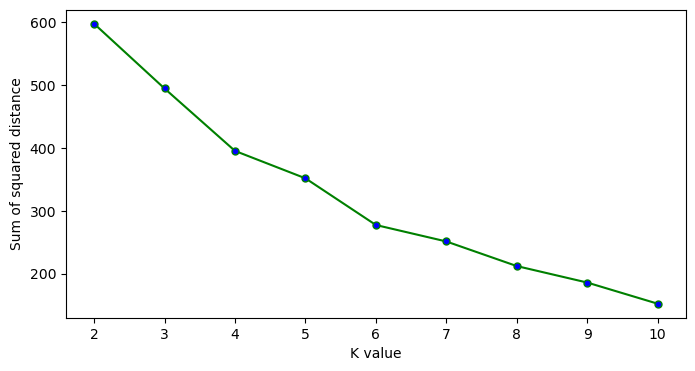

In [25]:
# Plot the sum of squared distance to determine optimal number of clusters (Elbow method)
plt.figure(figsize=(8,4),dpi=100)
plt.plot(range(2,11), ssd, marker='o', color= 'green', markerfacecolor='blue', markersize=5)
plt.xlabel("K value")
plt.ylabel("Sum of squared distance")

- Not clearly indicating whether the k value should be 5 or 6

In [26]:
# Check Silhouette score ( ranges from -1 to 1)
#  1 - well clustering, 0- overlapping negative and -1 wrong clustering

# Check Silhouette score for k = 5
from sklearn.metrics import silhouette_score

model_kfive = KMeans(n_clusters=5,random_state=42)
model_kfive.fit(scaled_df)

labels_kfive = model_kfive.predict(scaled_df) # Get cluster labels for each sample
silhouette_score(scaled_df, labels_kfive)

0.2719102346618833

In [27]:
# Check Silhouette score for k = 6
from sklearn.metrics import silhouette_score

model_ksix = KMeans(n_clusters=6,random_state=42)
model_ksix.fit(scaled_df)

labels_ksix = model_ksix.predict(scaled_df) # Get cluster labels for each sample
silhouette_score(scaled_df, labels_ksix)

0.33475434756692174

In [28]:
# Interactive 3D scatter plot of customers for k=5
import plotly.express as px
fig = px.scatter_3d(
    df,
    x='Age',
    y='Annual Income (k$)',
    z='Spending Score (1-100)',
    color=model_kfive.fit_predict(df),
    symbol='Gender_Male',
    opacity=0.75
    )
fig.update_layout(coloraxis_colorbar=dict(yanchor='top', y=1, x=0, ticks='outside'))

In [29]:
# Interactive 3D scatter plot of customers for k=6
import plotly.express as px
fig = px.scatter_3d(
    df,
    x='Age',
    y='Annual Income (k$)',
    z='Spending Score (1-100)',
    color=model_ksix.fit_predict(df),
    symbol='Gender_Male',
    opacity=0.75
    )
fig.update_layout(coloraxis_colorbar=dict(yanchor='top', y=1, x=0, ticks='outside'))

With both values of k, there are few overlaps. Let's verify further with Davies-Bouldin score

In [30]:
# Davies Bouldin Score for k=5
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(df,labels_kfive)

1.8420811571787692

In [31]:
# Davies Bouldin Score for k=6

from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(df,labels_ksix)

2.750211062149702

A lower value of the Davies-Bouldin score gives better clustering, so we can now clearly say that **k=5** is a better k value so there should be 5 clusters.

## Agglomerative Hierarchical clustering

AgglomerativeClustering builds a hierarchy of clusters by progressively merging the closest points/clusters

In [32]:
# Initially perform Agglomerative Clustering with no k values (n_clusters=None)
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram

# distance_threshold=0 forces the algorithm to merge until each point is its own cluster (max granularity)
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)

# Fit the model and get cluster labels
cluster_labels = model.fit_predict(df)

cluster_labels # Each point will get its own label since distance_threshold=0

array([195, 132, 103, 197, 189, 166, 117, 135, 153, 129, 199, 172, 177,
       188, 139, 159, 184, 147, 157, 181, 171, 140, 143, 104, 127, 111,
       156, 123, 108, 119, 116, 109, 121, 113, 175, 124, 173, 163, 191,
       165, 100, 112, 110, 174, 120, 183, 144, 131, 196, 155, 182, 176,
       142, 133,  82, 138, 178, 136, 125, 141,  91, 154, 170, 134, 169,
        99, 128, 185, 114, 107,  65, 187, 101,  61, 164,  88,  93, 126,
        56,  85, 115,  57, 137, 190,  87, 198,  81, 186, 179, 160,  77,
        69, 192, 130, 193,  43, 102, 167,  62,  79, 194,  94,  64,  76,
       149, 150,  97,  70, 148, 106, 180, 122,  89,  86,  96, 151,  54,
        92, 145, 118,  63,  74,  31, 162, 146,  59,  55, 161,  58,  98,
       168,  27,  28,  46, 152,  72,  34,  50,  73,  40,  75,  71,  80,
        83,  49,  66,  53,  95,  84,  13,  90,  44,  35,  60, 158,  36,
        45,  37,  29,  67,  39,  51,  47,  42,  30,  21,  48,  19,  22,
        41,  78,  68,  33,  16, 105,  26,  17,  32,  20,  15,  5

In [33]:
# Build the linkage matrix to plot dendrogram
# model.children_ - tells which clusters/points were merged at each step
linkage_matrix = hierarchy.linkage(model.children_)

linkage_matrix[:][:5] # First 5 rows of the linkage matrix
# Format: point1, point2, distance between the points, number of points in the cluster
# or Format: [cluster1, cluster2, distance, sample_count]

array([[ 76.        , 113.        ,   1.41421356,   2.        ],
       [ 43.        ,  88.        ,   1.41421356,   2.        ],
       [  9.        ,  47.        ,   1.41421356,   2.        ],
       [ 49.        ,  91.        ,   1.41421356,   2.        ],
       [ 24.        ,  93.        ,   1.41421356,   2.        ]])

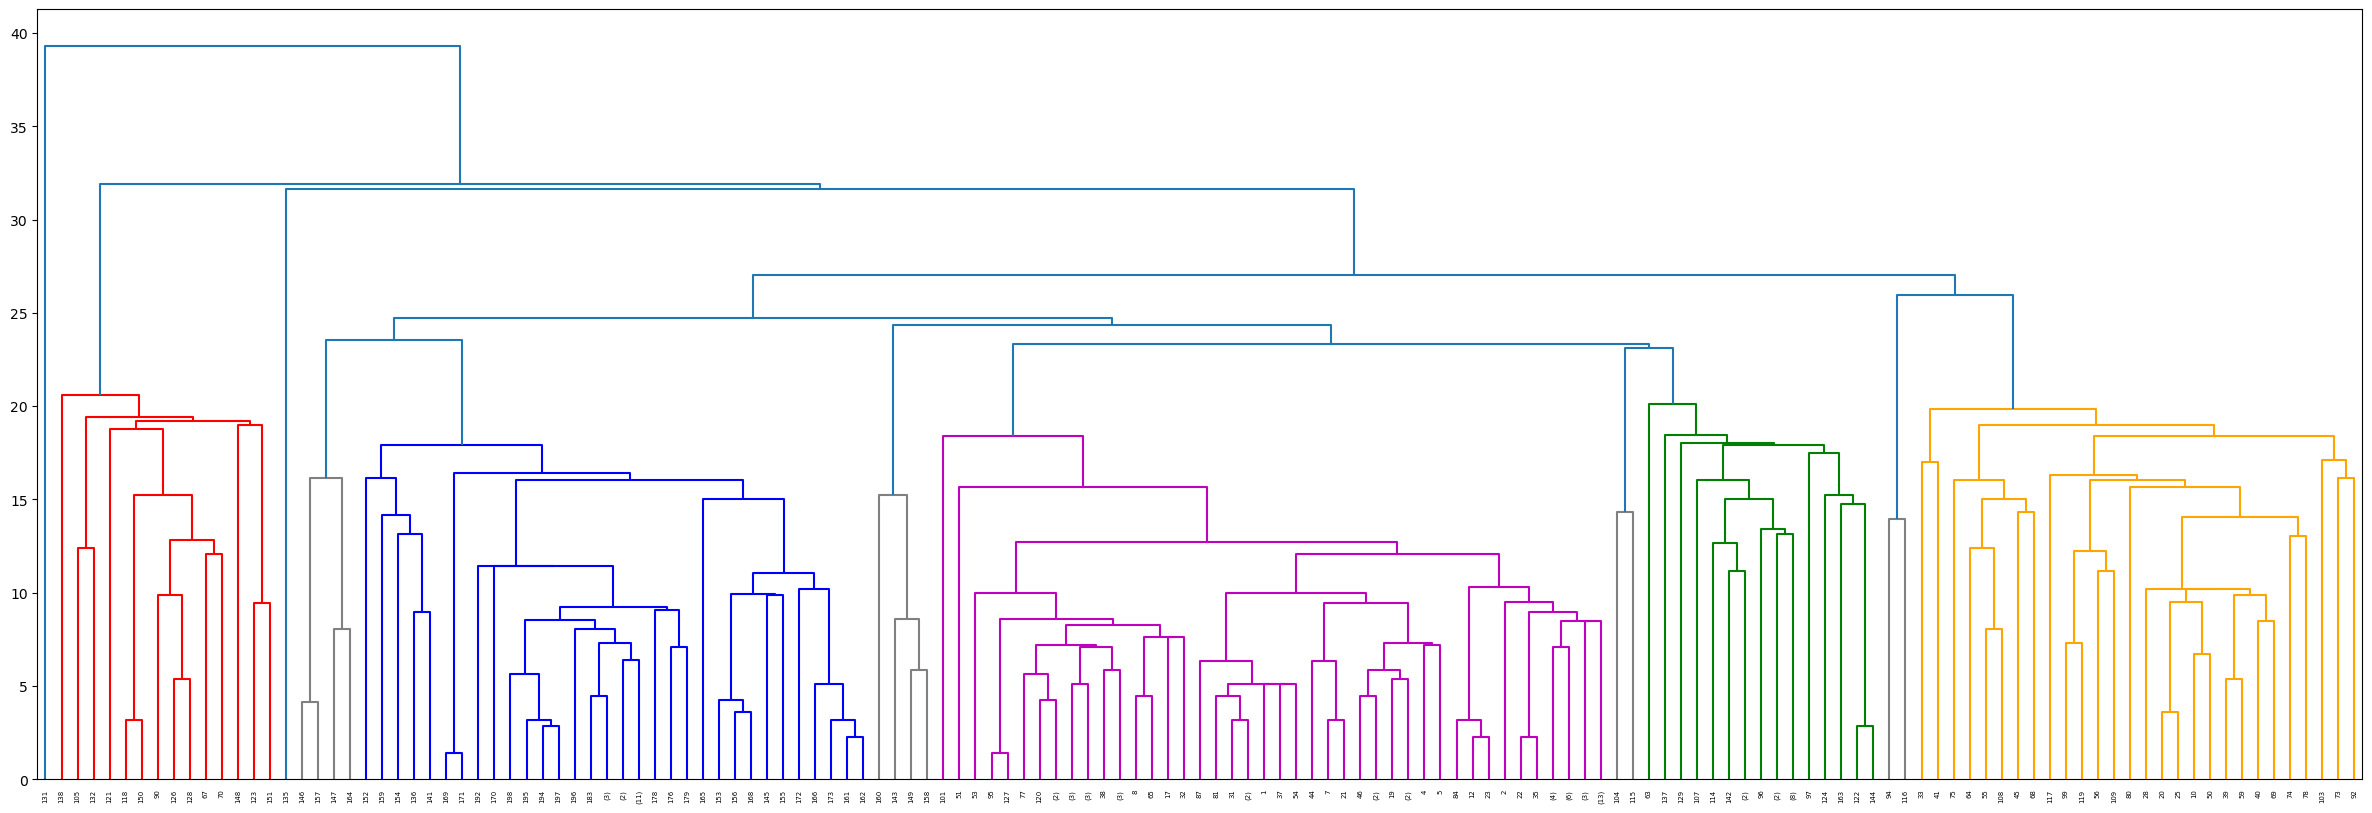

In [34]:
plt.figure(figsize=(30,10))

# Set color for the clusters so that different clusters stand out.
hierarchy.set_link_color_palette(['r','grey','b','grey','m','grey','g','grey','orange'])

# Plot the dendrogram
# truncate_mode='level' shows only the last p merges (keeps tree manageable)
# for example, instead of plotting all 200 customers, it only shows the tree at the last p=15 levels.
# p=15 shows 15 levels of the hierarchy instead of all 200 customers.
# color_threshold=23 cuts the dendrogram at this distance for coloring clusters
# for example,any merges happening below distance 23 will get colored differently
dn = hierarchy.dendrogram(linkage_matrix, truncate_mode='level', p=15, color_threshold=23)


Now, if we look at the Longest gap between two vertical lines trying to merge, it will be at the right-most end. Now just before these two lines merge, if we draw a horizontal line then we will get five intersecting points indicating there should be **5 distinct clusters**.

In [35]:
# Now we can do the clustering based on the decided k value of 5 by looking at the dendrogram
model_kfive_agg = AgglomerativeClustering(n_clusters=5)
model_kfive_agg.fit_predict(df) #Predict the categories of each point

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [36]:
# Interactive 3D scatter plot of customers for k=5
import plotly.express as px
fig = px.scatter_3d(
    df,
    x='Age',
    y='Annual Income (k$)',
    z='Spending Score (1-100)',
    color=model_kfive_agg.fit_predict(df),
    symbol='Gender_Male',
    opacity=0.75
    )
fig.update_layout(coloraxis_colorbar=dict(yanchor='top', y=1, x=0, ticks='outside'))

Now which is performing better ? Kmeans or Agglomerative hierarchical clustering?
- Let's identify with the silhouette score

In [37]:
# Check Silhouette score of Agglomerative hierarchical clustering with k=5
silhouette_score(df, model_kfive_agg.fit_predict(df))

0.43997527212476695

- Kmeans clustering with k=5 had silhouette_score of 0.2719102346618833.
- So Silhouette score of Agglomerative hierarchical is more closer to 1 so it should be better
- Now, let's verify this with Davies Bouldin Score for k=5, where a lower score indicates better clustering.

In [38]:
# Check Davies Bouldin Score of Agglomerative hierarchical clustering with k=5
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(df,model_kfive_agg.fit_predict(df))

0.8220436090843715


- Kmeans clustering with k=5 had Davies Bouldin Score of 1.8420811571787692
- So Davies Bouldin Score of Agglomerative hierarchical is lower and hence better.

So clearly Agglomerative hierarchical clustering is performing better than K-means clustering.

## Density-based clustering

In [39]:
from sklearn.cluster import DBSCAN
outlier_percent = []

for eps in np.linspace(0.001,3,50): # Check for 50 values of epsilon between 0.001 and 50
  #Create Model
  dbscan = DBSCAN(eps=eps, min_samples=8)
  dbscan.fit(scaled_df)

  # Percentage of points that are outliers
  perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
  outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Epsilon value')

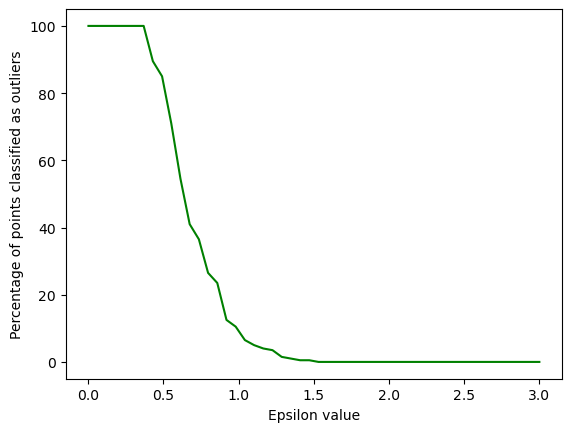

In [40]:
sns.lineplot(x=np.linspace(0.001,3,50), y=outlier_percent, color='green')
plt.ylabel("Percentage of points classified as outliers")
plt.xlabel("Epsilon value")

It is quite evident that the epsilon value should be from 1.1 to 1.3 with the elbow method.

In [41]:
# Check for epsilon value 1.2
dbscan = DBSCAN(eps=1.2, min_samples=8)
dbscan.fit(scaled_df)

DBSCAN(eps=1.2, min_samples=8)

In [42]:
dbscan.labels_

array([ 0,  0,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  0,  1,
        0,  0,  1,  0,  0,  1,  0,  1,  0,  1,  0,  1,  1, -1,  1, -1,  0,
        1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  0,  1,  1,  0,  0,  1,  1,
        0,  1,  0,  1,  1,  1,  0,  0,  1,  0,  1,  1,  0,  0,  0,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  1,  1,
        0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,
        1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  0,  1,  1,  0,  0,  0,  1,
        1,  1,  1,  0,  1,  0,  1,  1,  1,  0,  1,  0,  1,  0,  1,  1,  0,
        0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  0,  1,
        0,  1,  1,  1,  1,  0,  1,  1,  1,  1,  0, -1, -1])

In [43]:
# Interactive 3D scatter plot of customers with epsilon value 1.2
import plotly.express as px
fig = px.scatter_3d(
    df,
    x='Age',
    y='Annual Income (k$)',
    z='Spending Score (1-100)',
    color=dbscan.labels_,
    symbol='Gender_Male',
    opacity=0.75
    )
fig.update_layout(coloraxis_colorbar=dict(yanchor='top', y=1, x=0, ticks='outside'))

- By looking at the graph, DBSCAN is not doing well because the amount of data is low, and also the number of outliers are not that much.
- DBSCAN is best used when the number of outliers is high.

## Mapping Cluster IDs to Customer Segments

Since Agglomerative clustering has given better results till now, so lets go ahead with Agglomerative clustering.

In [44]:
df['label'] = model_kfive_agg.fit_predict(df)
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,label
0,19,15,39,True,4
1,21,15,81,True,3
2,20,16,6,False,4
3,23,16,77,False,3
4,31,17,40,False,4
...,...,...,...,...,...
195,35,120,79,False,2
196,45,126,28,False,1
197,32,126,74,True,2
198,32,137,18,True,1


In [45]:
df['label'] = df['label'].map({
    0:'High Income and lavish lifestyle',      # Blue cluster
    1:'Average Income and average lifestyle',  # Purple cluster
    2:'High Income and meagre lifestyle',      # Pink cluster
    3:'Low Income and meagre lifestyle',       # Orange cluster
    4:'Low Income and lavish lifestyle'        # Yellow cluster
})

df['Gender'] = df['Gender_Male'].map({True: 'Male', False: 'Female'})
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,label,Gender
0,19,15,39,True,Low Income and lavish lifestyle,Male
1,21,15,81,True,Low Income and meagre lifestyle,Male
2,20,16,6,False,Low Income and lavish lifestyle,Female
3,23,16,77,False,Low Income and meagre lifestyle,Female
4,31,17,40,False,Low Income and lavish lifestyle,Female
...,...,...,...,...,...,...
195,35,120,79,False,High Income and meagre lifestyle,Female
196,45,126,28,False,Average Income and average lifestyle,Female
197,32,126,74,True,High Income and meagre lifestyle,Male
198,32,137,18,True,Average Income and average lifestyle,Male


## Conclusion

In this case study, we explored multiple clustering techniques to segment mall customers.

After comparing K-Means, Agglomerative Hierarchical Clustering, and DBSCAN using silhouette and Davies-Bouldin scores, Agglomerative clustering emerged as the best-performing method. The final clusters revealed five distinct customer segments based on income and spending behavior.

These insights can help businesses design targeted marketing strategies and improve customer engagement.